In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns
import os
import cv2
import ast


In [2]:
# function to return a vector of frequency of all intensities from 0 to 255

def get_img_vector(img):
    img_vector = np.zeros(256)
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            img_vector[img[i][j]] += 1
    return img_vector


# function to calculate euclidean distance between two vectors
def euclidean_distance(vector1, vector2):
    return np.sqrt(np.sum(np.square(vector1 - vector2)))

# function to calculate manhattan distance between two vectors
def manhattan_distance(vector1, vector2):
    return np.sum(np.abs(vector1 - vector2))

In [3]:

# functions for file handling

def formatString(string):
    string = string.replace("array([", "[")
    string = string.replace("]),array([", "],[")
    string = string.replace("])", "]")
    return string


def convertToArray(string):
    listArr = ast.literal_eval(string)
    return listArr


def tupleToList(listArr):
    array = []
    for i in range(len(listArr)):
        array.append(listArr[i])
    return array

def loadFile(path):
    with open(path, 'r') as f:
        vector = f.read()
        vector = formatString(vector)
        vector = convertToArray(vector)
        vector = tupleToList(vector)
        f.close()
    return vector

        
def saveFile(path, vector):
    with open(path, 'w') as f:
        f.write(str(vector))
        f.close()

In [4]:
dataset_path = "../dataset/Skin cancer ISIC The International Skin Imaging Collaboration"

In [5]:
actinic_keratosis_train_length = len(os.listdir(dataset_path + "/sharpened/Train/actinic keratosis"))
basal_cell_carcinoma_train_length = len(os.listdir(dataset_path + "/sharpened/Train/basal cell carcinoma"))
dermatofibroma_train_length = len(os.listdir(dataset_path + "/sharpened/Train/dermatofibroma"))
melanoma_train_length = len(os.listdir(dataset_path + "/sharpened/Train/melanoma"))
nevus_train_length = len(os.listdir(dataset_path + "/sharpened/Train/nevus"))
pigmented_benign_keratosis_train_length = len(os.listdir(dataset_path + "/sharpened/Train/pigmented benign keratosis"))
seborrheic_keratosis_train_length = len(os.listdir(dataset_path + "/sharpened/Train/seborrheic keratosis"))
squamous_cell_carcinoma_train_length = len(os.listdir(dataset_path + "/sharpened/Train/squamous cell carcinoma"))
vascular_lesion_train_length = len(os.listdir(dataset_path + "/sharpened/Train/vascular lesion"))

actinic_keratosis_test_length = len(os.listdir(dataset_path + "/sharpened/Test/actinic keratosis"))
basal_cell_carcinoma_test_length = len(os.listdir(dataset_path + "/sharpened/Test/basal cell carcinoma"))
dermatofibroma_test_length = len(os.listdir(dataset_path + "/sharpened/Test/dermatofibroma"))
melanoma_test_length = len(os.listdir(dataset_path + "/sharpened/Test/melanoma"))
nevus_test_length = len(os.listdir(dataset_path + "/sharpened/Test/nevus"))
pigmented_benign_keratosis_test_length = len(os.listdir(dataset_path + "/sharpened/Test/pigmented benign keratosis"))
seborrheic_keratosis_test_length = len(os.listdir(dataset_path + "/sharpened/Test/seborrheic keratosis"))
squamous_cell_carcinoma_test_length = len(os.listdir(dataset_path + "/sharpened/Test/squamous cell carcinoma"))
vascular_lesion_test_length = len(os.listdir(dataset_path + "/sharpened/Test/vascular lesion"))

print("\n\nTrain data length:\n")
print("\tactinic keratosis: ", actinic_keratosis_train_length)
print("\tbasal cell carcinoma: ", basal_cell_carcinoma_train_length)
print("\tdermatofibroma: ", dermatofibroma_train_length)
print("\tmelanoma: ", melanoma_train_length)
print("\tnevus: ", nevus_train_length)
print("\tpigmented benign keratosis: ", pigmented_benign_keratosis_train_length)
print("\tseborrheic keratosis: ", seborrheic_keratosis_train_length)
print("\tsquamous cell carcinoma: ", squamous_cell_carcinoma_train_length)
print("\tvascular lesion: ", vascular_lesion_train_length)

print("\n\nTest data length:\n")
print("\tactinic keratosis: ", actinic_keratosis_test_length)
print("\tbasal cell carcinoma: ", basal_cell_carcinoma_test_length)
print("\tdermatofibroma: ", dermatofibroma_test_length)
print("\tmelanoma: ", melanoma_test_length)
print("\tnevus: ", nevus_test_length)
print("\tpigmented benign keratosis: ", pigmented_benign_keratosis_test_length)
print("\tseborrheic keratosis: ", seborrheic_keratosis_test_length)
print("\tsquamous cell carcinoma: ", squamous_cell_carcinoma_test_length)
print("\tvascular lesion: ", vascular_lesion_test_length)





Train data length:

	actinic keratosis:  114
	basal cell carcinoma:  376
	dermatofibroma:  95
	melanoma:  438
	nevus:  357
	pigmented benign keratosis:  462
	seborrheic keratosis:  77
	squamous cell carcinoma:  181
	vascular lesion:  139


Test data length:

	actinic keratosis:  16
	basal cell carcinoma:  16
	dermatofibroma:  16
	melanoma:  16
	nevus:  16
	pigmented benign keratosis:  16
	seborrheic keratosis:  3
	squamous cell carcinoma:  16
	vascular lesion:  3


In [6]:
actinic_keratosis_train_images = []
basal_cell_carcinoma_train_images = []
dermatofibroma_train_images = []
melanoma_train_images = []
nevus_train_images = []
pigmented_benign_keratosis_train_images = []
seborrheic_keratosis_train_images = []
squamous_cell_carcinoma_train_images = []
vascular_lesion_train_images = []

actinic_keratosis_test_images = []
basal_cell_carcinoma_test_images = []
dermatofibroma_test_images = []
melanoma_test_images = []
nevus_test_images = []
pigmented_benign_keratosis_test_images = []
seborrheic_keratosis_test_images = []
squamous_cell_carcinoma_test_images = []
vascular_lesion_test_images = []

actinic_keratosis_train = os.listdir(dataset_path + "/sharpened/Train/actinic keratosis");
basal_cell_carcinoma_train = os.listdir(dataset_path + "/sharpened/Train/basal cell carcinoma");
dermatofibroma_train = os.listdir(dataset_path + "/sharpened/Train/dermatofibroma");
melanoma_train = os.listdir(dataset_path + "/sharpened/Train/melanoma");
nevus_train = os.listdir(dataset_path + "/sharpened/Train/nevus");
pigmented_benign_keratosis_train = os.listdir(dataset_path + "/sharpened/Train/pigmented benign keratosis");
seborrheic_keratosis_train = os.listdir(dataset_path + "/sharpened/Train/seborrheic keratosis");
squamous_cell_carcinoma_train = os.listdir(dataset_path + "/sharpened/Train/squamous cell carcinoma");
vascular_lesion_train = os.listdir(dataset_path + "/sharpened/Train/vascular lesion");

actinic_keratosis_test = os.listdir(dataset_path + "/sharpened/Test/actinic keratosis");
basal_cell_carcinoma_test = os.listdir(dataset_path + "/sharpened/Test/basal cell carcinoma");
dermatofibroma_test = os.listdir(dataset_path + "/sharpened/Test/dermatofibroma");
melanoma_test = os.listdir(dataset_path + "/sharpened/Test/melanoma");
nevus_test = os.listdir(dataset_path + "/sharpened/Test/nevus");
pigmented_benign_keratosis_test = os.listdir(dataset_path + "/sharpened/Test/pigmented benign keratosis");
seborrheic_keratosis_test = os.listdir(dataset_path + "/sharpened/Test/seborrheic keratosis");
squamous_cell_carcinoma_test = os.listdir(dataset_path + "/sharpened/Test/squamous cell carcinoma");
vascular_lesion_test = os.listdir(dataset_path + "/sharpened/Test/vascular lesion");


In [7]:
for i in range(0, actinic_keratosis_train_length):
    actinic_keratosis_train_images.append(cv2.imread(dataset_path + "/sharpened/Train/actinic keratosis/" + actinic_keratosis_train[i]))

for i in range(0, basal_cell_carcinoma_train_length):
    basal_cell_carcinoma_train_images.append(cv2.imread(dataset_path + "/sharpened/Train/basal cell carcinoma/" + basal_cell_carcinoma_train[i]))

for i in range(0, dermatofibroma_train_length):
    dermatofibroma_train_images.append(cv2.imread(dataset_path + "/sharpened/Train/dermatofibroma/" + dermatofibroma_train[i]))

for i in range(0, melanoma_train_length):
    melanoma_train_images.append(cv2.imread(dataset_path + "/sharpened/Train/melanoma/" + melanoma_train[i]))

for i in range(0, nevus_train_length):
    nevus_train_images.append(cv2.imread(dataset_path + "/sharpened/Train/nevus/" + nevus_train[i]))

for i in range(0, pigmented_benign_keratosis_train_length):
    pigmented_benign_keratosis_train_images.append(cv2.imread(dataset_path + "/sharpened/Train/pigmented benign keratosis/" + pigmented_benign_keratosis_train[i]))

for i in range(0, seborrheic_keratosis_train_length):
    seborrheic_keratosis_train_images.append(cv2.imread(dataset_path + "/sharpened/Train/seborrheic keratosis/" + seborrheic_keratosis_train[i]))

for i in range(0, squamous_cell_carcinoma_train_length):
    squamous_cell_carcinoma_train_images.append(cv2.imread(dataset_path + "/sharpened/Train/squamous cell carcinoma/" + squamous_cell_carcinoma_train[i]))

for i in range(0, vascular_lesion_train_length):
    vascular_lesion_train_images.append(cv2.imread(dataset_path + "/sharpened/Train/vascular lesion/" + vascular_lesion_train[i]))

for i in range(0, actinic_keratosis_test_length):
    actinic_keratosis_test_images.append(cv2.imread(dataset_path + "/sharpened/Test/actinic keratosis/" + actinic_keratosis_test[i]))

for i in range(0, basal_cell_carcinoma_test_length):
    basal_cell_carcinoma_test_images.append(cv2.imread(dataset_path + "/sharpened/Test/basal cell carcinoma/" + basal_cell_carcinoma_test[i]))

for i in range(0, dermatofibroma_test_length):
    dermatofibroma_test_images.append(cv2.imread(dataset_path + "/sharpened/Test/dermatofibroma/" + dermatofibroma_test[i]))

for i in range(0, melanoma_test_length):
    melanoma_test_images.append(cv2.imread(dataset_path + "/sharpened/Test/melanoma/" + melanoma_test[i]))

for i in range(0, nevus_test_length):
    nevus_test_images.append(cv2.imread(dataset_path + "/sharpened/Test/nevus/" + nevus_test[i]))

for i in range(0, pigmented_benign_keratosis_test_length):
    pigmented_benign_keratosis_test_images.append(cv2.imread(dataset_path + "/sharpened/Test/pigmented benign keratosis/" + pigmented_benign_keratosis_test[i]))

for i in range(0, seborrheic_keratosis_test_length):
    seborrheic_keratosis_test_images.append(cv2.imread(dataset_path + "/sharpened/Test/seborrheic keratosis/" + seborrheic_keratosis_test[i]))

for i in range(0, squamous_cell_carcinoma_test_length):
    squamous_cell_carcinoma_test_images.append(cv2.imread(dataset_path + "/sharpened/Test/squamous cell carcinoma/" + squamous_cell_carcinoma_test[i]))

for i in range(0, vascular_lesion_test_length):
    vascular_lesion_test_images.append(cv2.imread(dataset_path + "/sharpened/Test/vascular lesion/" + vascular_lesion_test[i]))

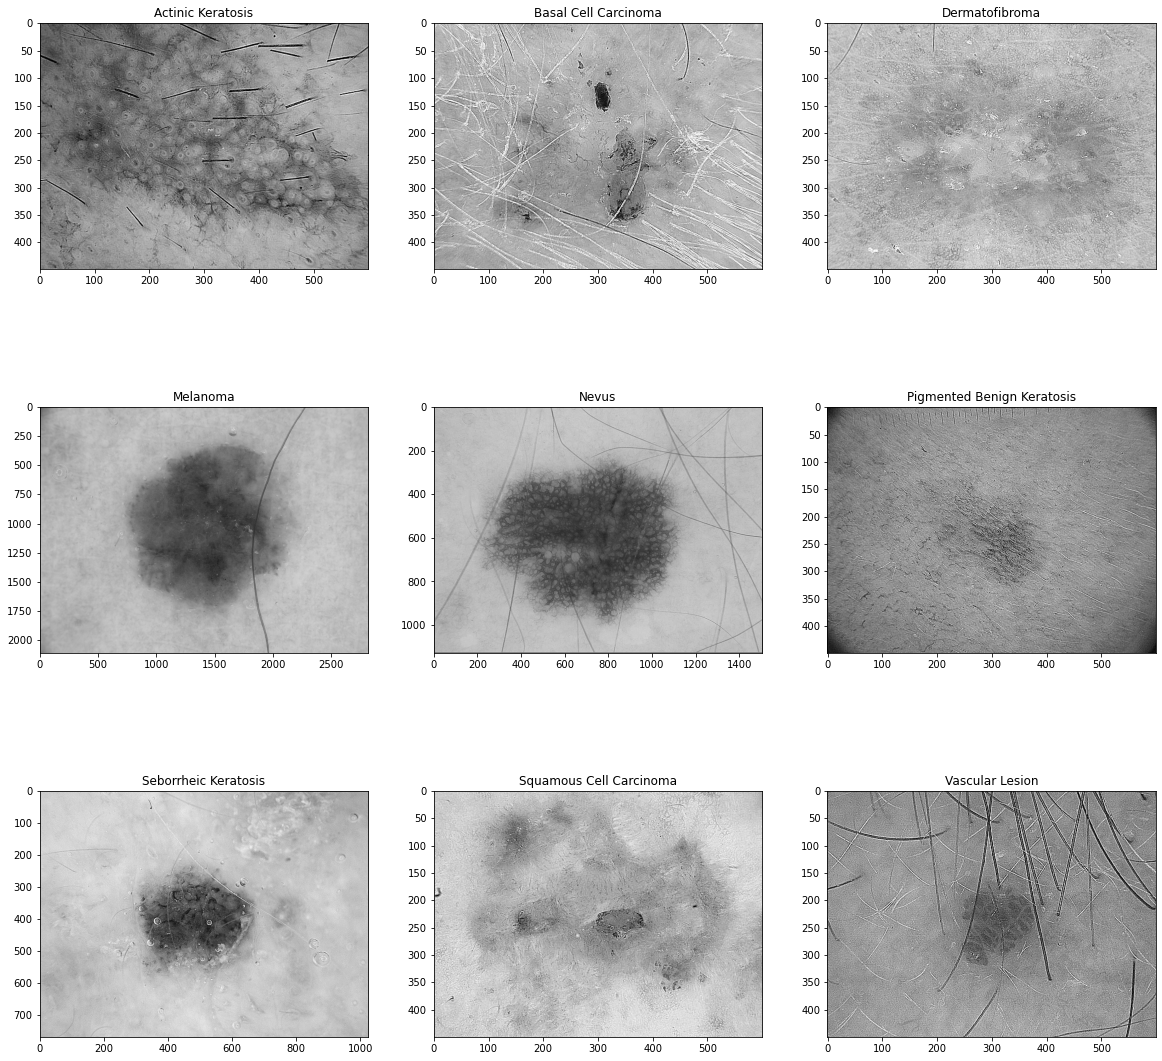

In [8]:
# display 3 images of all classes with titles
plt.figure(figsize=(20, 20))
plt.subplot(3, 3, 1)
plt.imshow(actinic_keratosis_train_images[0])
plt.title("Actinic Keratosis")
plt.subplot(3, 3, 2)
plt.imshow(basal_cell_carcinoma_train_images[0])
plt.title("Basal Cell Carcinoma")
plt.subplot(3, 3, 3)
plt.imshow(dermatofibroma_train_images[0])
plt.title("Dermatofibroma")
plt.subplot(3, 3, 4)
plt.imshow(melanoma_train_images[0])
plt.title("Melanoma")
plt.subplot(3, 3, 5)
plt.imshow(nevus_train_images[0])
plt.title("Nevus")
plt.subplot(3, 3, 6)
plt.imshow(pigmented_benign_keratosis_train_images[0])
plt.title("Pigmented Benign Keratosis")
plt.subplot(3, 3, 7)
plt.imshow(seborrheic_keratosis_train_images[0])
plt.title("Seborrheic Keratosis")
plt.subplot(3, 3, 8)
plt.imshow(squamous_cell_carcinoma_train_images[0])
plt.title("Squamous Cell Carcinoma")
plt.subplot(3, 3, 9)
plt.imshow(vascular_lesion_train_images[0])
plt.title("Vascular Lesion")
plt.show()



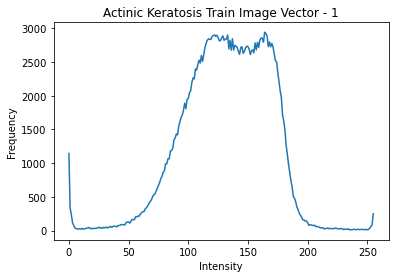

[1142.  337.  238.  120.   75.   41.   29.   23.   26.   25.   22.   33.
   20.   27.   30.   38.   37.   46.   32.   25.   35.   29.   34.   32.
   42.   49.   38.   44.   34.   48.   40.   51.   40.   45.   57.   59.
   49.   63.   65.   64.   54.   75.   73.   82.   90.   88.   83.   87.
  122.  125.  129.  110.  137.  166.  159.  167.  206.  204.  217.  214.
  248.  268.  282.  283.  325.  339.  365.  399.  428.  453.  496.  531.
  539.  582.  626.  672.  712.  771.  805.  866.  885.  991.  990. 1064.
 1062. 1178. 1188. 1219. 1344. 1372. 1432. 1418. 1545. 1616. 1676. 1715.
 1785. 1888. 1808. 1948. 1956. 2044. 2075. 2195. 2262. 2248. 2397. 2379.
 2459. 2526. 2483. 2596. 2507. 2615. 2716. 2779. 2824. 2842. 2832. 2837.
 2878. 2891. 2901. 2879. 2894. 2861. 2812. 2818. 2861. 2885. 2820. 2839.
 2841. 2899. 2694. 2821. 2675. 2844. 2676. 2747. 2732. 2714. 2655. 2612.
 2716. 2724. 2627. 2656. 2710. 2733. 2727. 2690. 2609. 2663. 2680. 2636.
 2782. 2679. 2790. 2716. 2822. 2856. 2851. 2792. 29

In [9]:
img = actinic_keratosis_train_images[0]
img_vector = get_img_vector(img)
plt.plot(img_vector)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Actinic Keratosis Train Image Vector - 1')
plt.show()

print(img_vector)

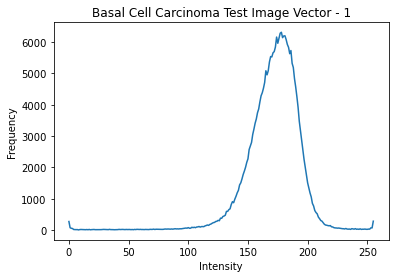

[2.720e+02 7.300e+01 5.600e+01 4.800e+01 1.700e+01 1.500e+01 1.300e+01
 1.500e+01 4.000e+00 1.400e+01 1.800e+01 1.600e+01 1.500e+01 1.200e+01
 1.100e+01 1.600e+01 1.000e+01 1.900e+01 8.000e+00 1.300e+01 1.400e+01
 1.800e+01 1.200e+01 1.200e+01 1.400e+01 1.000e+01 1.200e+01 1.300e+01
 1.600e+01 2.000e+01 1.800e+01 1.800e+01 1.700e+01 1.300e+01 2.200e+01
 1.400e+01 1.500e+01 1.300e+01 1.000e+01 1.100e+01 1.500e+01 1.400e+01
 2.100e+01 1.600e+01 1.900e+01 2.000e+01 1.600e+01 1.400e+01 1.900e+01
 1.600e+01 1.800e+01 1.800e+01 1.200e+01 1.700e+01 1.100e+01 2.000e+01
 1.500e+01 2.300e+01 2.000e+01 1.800e+01 2.100e+01 1.600e+01 1.800e+01
 1.400e+01 1.900e+01 1.800e+01 1.700e+01 1.500e+01 2.300e+01 2.000e+01
 2.100e+01 2.900e+01 1.800e+01 2.600e+01 2.600e+01 2.700e+01 2.300e+01
 2.100e+01 2.100e+01 2.200e+01 3.000e+01 3.300e+01 2.900e+01 3.400e+01
 3.100e+01 2.800e+01 3.400e+01 2.800e+01 3.500e+01 4.200e+01 3.500e+01
 3.800e+01 3.400e+01 4.100e+01 3.900e+01 4.600e+01 5.200e+01 5.900e+01
 6.400

In [10]:
img = basal_cell_carcinoma_test_images[0]
img_vector = get_img_vector(img)
plt.plot(img_vector)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Basal Cell Carcinoma Test Image Vector - 1')
plt.show()

print(img_vector)

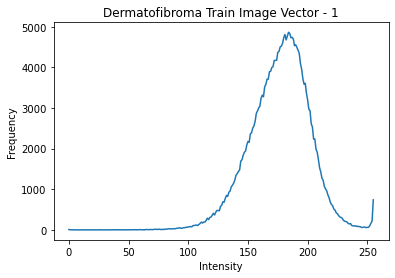

[1.000e+01 4.000e+00 3.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 1.000e+00 1.000e+00 0.000e+00 1.000e+00 1.000e+00 3.000e+00
 1.000e+00 1.000e+00 1.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00
 2.000e+00 2.000e+00 2.000e+00 0.000e+00 1.000e+00 4.000e+00 2.000e+00
 0.000e+00 2.000e+00 0.000e+00 3.000e+00 1.000e+00 2.000e+00 0.000e+00
 3.000e+00 3.000e+00 3.000e+00 2.000e+00 2.000e+00 4.000e+00 2.000e+00
 2.000e+00 1.000e+00 4.000e+00 3.000e+00 3.000e+00 3.000e+00 4.000e+00
 2.000e+00 0.000e+00 6.000e+00 2.000e+00 5.000e+00 4.000e+00 4.000e+00
 6.000e+00 4.000e+00 2.000e+00 6.000e+00 7.000e+00 4.000e+00 5.000e+00
 4.000e+00 4.000e+00 1.200e+01 7.000e+00 6.000e+00 1.100e+01 8.000e+00
 9.000e+00 9.000e+00 1.800e+01 1.200e+01 1.600e+01 1.200e+01 1.900e+01
 8.000e+00 1.500e+01 8.000e+00 1.900e+01 1.600e+01 1.800e+01 2.700e+01
 3.000e+01 2.500e+01 2.300e+01 3.300e+01 2.600e+01 3.000e+01 3.700e+01
 4.300e+01 4.800e+01 5.100e+01 3.900e+01 4.300e+01 5.500e+01 5.400e+01
 6.400

In [11]:
img = dermatofibroma_train_images[0]
img_vector = get_img_vector(img)
plt.plot(img_vector)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Dermatofibroma Train Image Vector - 1')
plt.show()

print(img_vector)

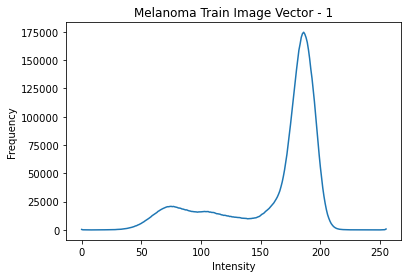

[4.26000e+02 1.24000e+02 9.90000e+01 6.70000e+01 3.60000e+01 4.00000e+01
 3.60000e+01 5.10000e+01 2.90000e+01 4.50000e+01 5.40000e+01 5.50000e+01
 5.40000e+01 6.40000e+01 6.50000e+01 6.30000e+01 8.60000e+01 1.10000e+02
 1.03000e+02 1.22000e+02 1.08000e+02 1.34000e+02 1.71000e+02 1.77000e+02
 1.95000e+02 1.94000e+02 2.63000e+02 2.80000e+02 2.90000e+02 4.17000e+02
 4.56000e+02 4.93000e+02 6.08000e+02 6.19000e+02 7.57000e+02 9.29000e+02
 9.85000e+02 1.20200e+03 1.33800e+03 1.58000e+03 1.77400e+03 2.03500e+03
 2.32900e+03 2.64900e+03 2.99800e+03 3.50900e+03 3.74600e+03 4.34000e+03
 4.73500e+03 5.24400e+03 5.84300e+03 6.56100e+03 7.12100e+03 7.92900e+03
 8.58700e+03 9.25300e+03 1.00160e+04 1.07480e+04 1.15640e+04 1.25580e+04
 1.32840e+04 1.40710e+04 1.47980e+04 1.54220e+04 1.64080e+04 1.69800e+04
 1.77190e+04 1.83030e+04 1.88630e+04 1.93320e+04 1.97200e+04 2.02530e+04
 2.05360e+04 2.05230e+04 2.07710e+04 2.08160e+04 2.05940e+04 2.07650e+04
 2.04030e+04 2.01800e+04 1.99130e+04 1.94240e+04 1.

In [12]:
img = melanoma_train_images[0]
img_vector = get_img_vector(img)
plt.plot(img_vector)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Melanoma Train Image Vector - 1')
plt.show()

print(img_vector)

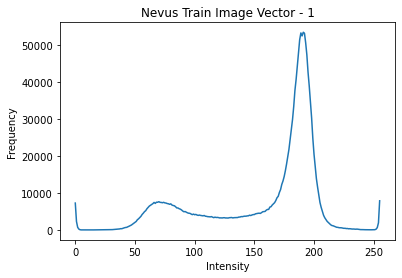

[7.2680e+03 2.2730e+03 6.9200e+02 2.2000e+02 4.6000e+01 6.0000e+00
 3.0000e+00 0.0000e+00 2.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 2.0000e+00 3.0000e+00 7.0000e+00 4.0000e+00
 2.0000e+00 8.0000e+00 1.5000e+01 1.8000e+01 1.6000e+01 1.7000e+01
 1.2000e+01 2.7000e+01 2.7000e+01 3.8000e+01 4.7000e+01 5.2000e+01
 6.4000e+01 8.0000e+01 1.0800e+02 1.1300e+02 1.4000e+02 1.7200e+02
 2.2800e+02 2.6100e+02 3.3800e+02 3.2700e+02 4.4900e+02 5.6400e+02
 6.5300e+02 6.9200e+02 8.3100e+02 9.9500e+02 1.1620e+03 1.3180e+03
 1.5610e+03 1.8260e+03 2.0440e+03 2.2880e+03 2.7500e+03 3.0060e+03
 3.3520e+03 3.6860e+03 4.1850e+03 4.5400e+03 4.9490e+03 5.2110e+03
 5.7200e+03 6.0970e+03 6.4490e+03 6.6800e+03 6.8960e+03 7.1140e+03
 7.4430e+03 7.1820e+03 7.5100e+03 7.4840e+03 7.6470e+03 7.4650e+03
 7.4390e+03 7.3620e+03 7.4710e+03 7.3250e+03 7.2760e+03 7.1400e+03
 7.0840e+03 6.9340e+03 7.0580e+03 6.7320e+03 6.6100e+03 6.5380e+03
 6.2880e+03 5.9570e+03 5.9430e+03 5.7420e+03 5.6200e+03 5.4090

In [13]:
img = nevus_train_images[0]
img_vector = get_img_vector(img)
plt.plot(img_vector)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Nevus Train Image Vector - 1')
plt.show()

print(img_vector)

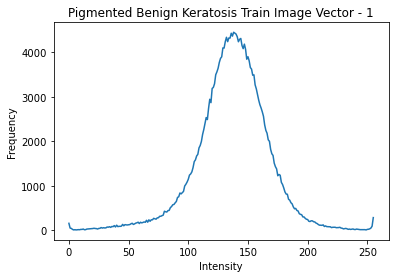

[ 161.   54.   47.   25.   13.   18.   13.   17.   19.   17.   25.   24.
   33.   17.   19.   32.   34.   34.   38.   39.   44.   50.   45.   43.
   33.   46.   49.   66.   54.   62.   57.   59.   78.   74.   85.   70.
   91.   85.  110.   79.  119.   87.   94.   93.   98.  137.  106.  132.
  126.  124.  128.  133.  150.  162.  136.  148.  165.  173.  186.  156.
  185.  171.  180.  192.  184.  229.  186.  239.  207.  240.  239.  272.
  264.  254.  283.  286.  318.  319.  333.  344.  432.  420.  414.  446.
  451.  513.  537.  577.  584.  620.  651.  742.  756.  841.  821.  847.
  876.  998. 1037. 1086. 1148. 1242. 1268. 1314. 1411. 1545. 1584. 1671.
 1708. 1853. 1907. 1998. 2154. 2265. 2399. 2533. 2488. 2739. 2943. 2867.
 3185. 3209. 3291. 3493. 3558. 3640. 3769. 3859. 3895. 4095. 4091. 4234.
 4333. 4235. 4317. 4315. 4424. 4359. 4446. 4426. 4406. 4347. 4233. 4287.
 4307. 4149. 4078. 4179. 4064. 3841. 3897. 3807. 3655. 3620. 3482. 3491.
 3267. 3177. 3050. 2924. 2821. 2748. 2662. 2562. 23

In [14]:
img = pigmented_benign_keratosis_train_images[0]
img_vector = get_img_vector(img)
plt.plot(img_vector)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Pigmented Benign Keratosis Train Image Vector - 1')
plt.show()

print(img_vector)

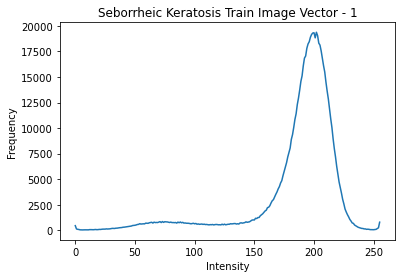

[  455.   132.    98.    81.    48.    40.    39.    46.    48.    44.
    44.    45.    67.    70.    64.    57.    71.    80.    64.    68.
    89.    84.    99.   115.   118.   117.   140.   127.   132.   144.
   171.   190.   183.   181.   209.   211.   233.   251.   259.   272.
   302.   308.   326.   348.   369.   386.   396.   419.   468.   481.
   494.   524.   569.   581.   647.   612.   627.   637.   630.   699.
   688.   685.   736.   760.   787.   708.   800.   757.   769.   760.
   805.   849.   760.   858.   777.   843.   824.   823.   792.   766.
   802.   757.   761.   747.   764.   706.   802.   740.   813.   734.
   781.   706.   720.   694.   694.   687.   665.   637.   667.   685.
   638.   669.   596.   625.   587.   597.   615.   579.   600.   564.
   575.   553.   531.   556.   546.   569.   529.   558.   573.   562.
   539.   547.   531.   600.   537.   606.   538.   564.   594.   590.
   643.   629.   638.   660.   661.   614.   642.   612.   713.   733.
   701

In [15]:
img = seborrheic_keratosis_train_images[0]
img_vector = get_img_vector(img)
plt.plot(img_vector)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Seborrheic Keratosis Train Image Vector - 1')
plt.show()

print(img_vector)

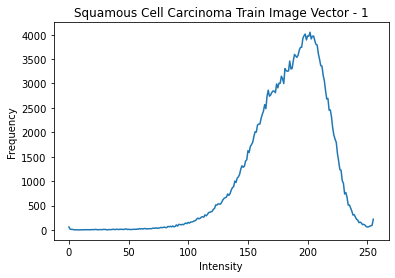

[6.000e+01 1.600e+01 1.100e+01 1.100e+01 4.000e+00 4.000e+00 5.000e+00
 2.000e+00 0.000e+00 1.000e+00 2.000e+00 5.000e+00 5.000e+00 4.000e+00
 3.000e+00 4.000e+00 5.000e+00 4.000e+00 3.000e+00 7.000e+00 5.000e+00
 6.000e+00 1.000e+01 9.000e+00 2.000e+00 6.000e+00 6.000e+00 7.000e+00
 6.000e+00 1.000e+01 9.000e+00 9.000e+00 0.000e+00 7.000e+00 6.000e+00
 6.000e+00 7.000e+00 1.500e+01 8.000e+00 8.000e+00 1.500e+01 9.000e+00
 9.000e+00 1.500e+01 1.000e+01 1.300e+01 8.000e+00 1.600e+01 2.000e+01
 9.000e+00 1.200e+01 1.000e+01 8.000e+00 9.000e+00 1.300e+01 1.300e+01
 1.300e+01 1.600e+01 1.400e+01 2.800e+01 1.700e+01 2.600e+01 1.900e+01
 2.800e+01 2.900e+01 1.900e+01 2.400e+01 2.500e+01 2.500e+01 2.500e+01
 3.100e+01 3.800e+01 3.200e+01 4.200e+01 3.400e+01 3.800e+01 4.000e+01
 5.200e+01 4.500e+01 5.200e+01 5.800e+01 4.600e+01 5.000e+01 7.200e+01
 6.400e+01 7.500e+01 6.200e+01 8.000e+01 6.300e+01 7.200e+01 1.020e+02
 7.900e+01 1.130e+02 1.110e+02 1.040e+02 1.140e+02 1.070e+02 1.290e+02
 1.410

In [16]:
img = squamous_cell_carcinoma_train_images[0]
img_vector = get_img_vector(img)
plt.plot(img_vector)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Squamous Cell Carcinoma Train Image Vector - 1')
plt.show()

print(img_vector)

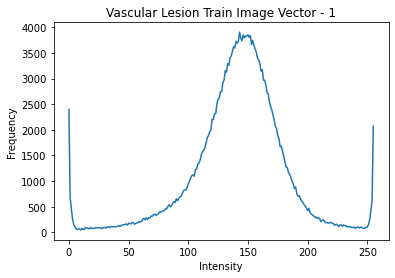

[2396.  681.  472.  267.  155.  105.   70.   55.   73.   70.   49.   77.
   56.   64.   94.   86.   83.   69.   96.   75.   83.   77.   89.   90.
   89.   91.   87.   86.   75.   98.   95.   85.  105.  109.   95.  115.
  113.  108.  116.  105.  116.  126.  133.  119.  140.  147.  149.  153.
  167.  143.  178.  174.  165.  195.  187.  161.  177.  189.  189.  215.
  203.  218.  261.  273.  243.  286.  255.  289.  286.  321.  317.  348.
  356.  331.  355.  367.  400.  393.  414.  418.  428.  467.  460.  510.
  539.  505.  524.  570.  603.  585.  656.  617.  665.  692.  704.  763.
  812.  831.  834.  877.  945. 1001. 1065. 1107. 1123. 1095. 1227. 1238.
 1337. 1351. 1418. 1522. 1574. 1613. 1652. 1752. 1854. 1889. 1968. 1994.
 2211. 2200. 2313. 2319. 2507. 2600. 2621. 2746. 2744. 2921. 2974. 3156.
 3124. 3292. 3262. 3402. 3444. 3535. 3622. 3596. 3725. 3690. 3734. 3903.
 3790. 3737. 3850. 3796. 3827. 3829. 3853. 3802. 3839. 3661. 3744. 3650.
 3575. 3514. 3395. 3361. 3288. 3145. 3174. 2968. 29

In [17]:
img = vascular_lesion_train_images[0]
img_vector = get_img_vector(img)
plt.plot(img_vector)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Vascular Lesion Train Image Vector - 1')
plt.show()

print(img_vector)

In [18]:
actinic_keratosis_train_vectors = []
basal_cell_carcinoma_train_vectors = []
dermatofibroma_train_vectors = []
melanoma_train_vectors = []
nevus_train_vectors = []
pigmented_benign_keratosis_train_vectors = []
seborrheic_keratosis_train_vectors = []
squamous_cell_carcinoma_train_vectors = []
vascular_lesion_train_vectors = []

actinic_keratosis_test_vectors = []
basal_cell_carcinoma_test_vectors = []
dermatofibroma_test_vectors = []
melanoma_test_vectors = []
nevus_test_vectors = []
pigmented_benign_keratosis_test_vectors = []
seborrheic_keratosis_test_vectors = []
squamous_cell_carcinoma_test_vectors = []
vascular_lesion_test_vectors = []

In [19]:
# convert all train and test images to vectors and save to the respective vectors array

for i in range(0,len(actinic_keratosis_train_images)):
    actinic_keratosis_train_vectors.append(get_img_vector(actinic_keratosis_train_images[i]))

for i in range(0,len(basal_cell_carcinoma_train_images)):
    basal_cell_carcinoma_train_vectors.append(get_img_vector(basal_cell_carcinoma_train_images[i]))

for i in range(0,len(dermatofibroma_train_images)):
    dermatofibroma_train_vectors.append(get_img_vector(dermatofibroma_train_images[i]))

for i in range(0,len(melanoma_train_images)):
    melanoma_train_vectors.append(get_img_vector(melanoma_train_images[i]))

for i in range(0,len(nevus_train_images)):
    nevus_train_vectors.append(get_img_vector(nevus_train_images[i]))

for i in range(0,len(pigmented_benign_keratosis_train_images)):
    pigmented_benign_keratosis_train_vectors.append(get_img_vector(pigmented_benign_keratosis_train_images[i]))

for i in range(0,len(seborrheic_keratosis_train_images)):
    seborrheic_keratosis_train_vectors.append(get_img_vector(seborrheic_keratosis_train_images[i]))

for i in range(0,len(squamous_cell_carcinoma_train_images)):
    squamous_cell_carcinoma_train_vectors.append(get_img_vector(squamous_cell_carcinoma_train_images[i]))

for i in range(0,len(vascular_lesion_train_images)):
    vascular_lesion_train_vectors.append(get_img_vector(vascular_lesion_train_images[i]))

for i in range(0,len(actinic_keratosis_test_images)):
    actinic_keratosis_test_vectors.append(get_img_vector(actinic_keratosis_test_images[i]))

for i in range(0,len(basal_cell_carcinoma_test_images)):
    basal_cell_carcinoma_test_vectors.append(get_img_vector(basal_cell_carcinoma_test_images[i]))

for i in range(0,len(dermatofibroma_test_images)):
    dermatofibroma_test_vectors.append(get_img_vector(dermatofibroma_test_images[i]))

for i in range(0,len(melanoma_test_images)):
    melanoma_test_vectors.append(get_img_vector(melanoma_test_images[i]))

for i in range(0,len(nevus_test_images)):
    nevus_test_vectors.append(get_img_vector(nevus_test_images[i]))

for i in range(0,len(pigmented_benign_keratosis_test_images)):
    pigmented_benign_keratosis_test_vectors.append(get_img_vector(pigmented_benign_keratosis_test_images[i]))

for i in range(0,__stop=len(seborrheic_keratosis_test_images)):
    seborrheic_keratosis_test_vectors.append(get_img_vector(seborrheic_keratosis_test_images[i]))

for i in range(0,len(squamous_cell_carcinoma_test_images)):
    squamous_cell_carcinoma_test_vectors.append(get_img_vector(squamous_cell_carcinoma_test_images[i]))

for i in range(0,len(vascular_lesion_test_images)):
    vascular_lesion_test_vectors.append(get_img_vector(vascular_lesion_test_images[i]))


In [20]:
# # save vectors as txt files

# saveFile("../features/sharpened/original_sharpened/Train/actinic_keratosis_train_vectors.txt", actinic_keratosis_train_vectors )
# saveFile("../features/sharpened/original_sharpened/Train/basal_cell_carcinoma_train_vectors.txt", basal_cell_carcinoma_train_vectors )
# saveFile("../features/sharpened/original_sharpened/Train/dermatofibroma_train_vectors.txt", dermatofibroma_train_vectors )
# saveFile("../features/sharpened/original_sharpened/Train/melanoma_train_vectors.txt", melanoma_train_vectors )
# saveFile("../features/sharpened/original_sharpened/Train/nevus_train_vectors.txt", nevus_train_vectors )
# saveFile("../features/sharpened/original_sharpened/Train/pigmented_benign_keratosis_train_vectors.txt", pigmented_benign_keratosis_train_vectors )
# saveFile("../features/sharpened/original_sharpened/Train/seborrheic_keratosis_train_vectors.txt", seborrheic_keratosis_train_vectors )
# saveFile("../features/sharpened/original_sharpened/Train/squamous_cell_carcinoma_train_vectors.txt", squamous_cell_carcinoma_train_vectors )
# saveFile("../features/sharpened/original_sharpened/Train/vascular_lesion_train_vectors.txt", vascular_lesion_train_vectors )

# saveFile("../features/sharpened/original_sharpened/Test/actinic_keratosis_test_vectors.txt", actinic_keratosis_test_vectors )
# saveFile("../features/sharpened/original_sharpened/Test/basal_cell_carcinoma_test_vectors.txt", basal_cell_carcinoma_test_vectors )
# saveFile("../features/sharpened/original_sharpened/Test/dermatofibroma_test_vectors.txt", dermatofibroma_test_vectors )
# saveFile("../features/sharpened/original_sharpened/Test/melanoma_test_vectors.txt", melanoma_test_vectors )
# saveFile("../features/sharpened/original_sharpened/Test/nevus_test_vectors.txt", nevus_test_vectors )
# saveFile("../features/sharpened/original_sharpened/Test/pigmented_benign_keratosis_test_vectors.txt", pigmented_benign_keratosis_test_vectors )
# saveFile("../features/sharpened/original_sharpened/Test/seborrheic_keratosis_test_vectors.txt", seborrheic_keratosis_test_vectors )
# saveFile("../features/sharpened/original_sharpened/Test/squamous_cell_carcinoma_test_vectors.txt", squamous_cell_carcinoma_test_vectors )
# saveFile("../features/sharpened/original_sharpened/Test/vascular_lesion_test_vectors.txt", vascular_lesion_test_vectors )

In [21]:
def plot_vectors(array_of_vectors, no_of_vectors_to_be_plotted, title):
    plt.figure(figsize=(20,10))
    for i in range(0,no_of_vectors_to_be_plotted):
        plt.plot(array_of_vectors[i], label = "Vector " + str(i+1))
    plt.legend()
    plt.title(title)
    plt.show()

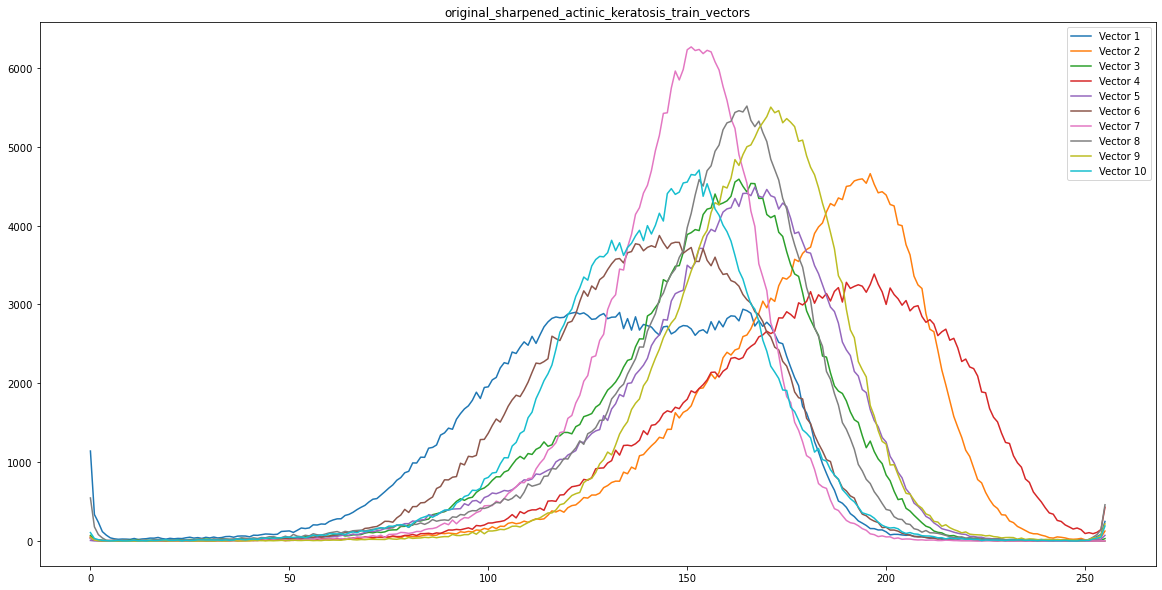

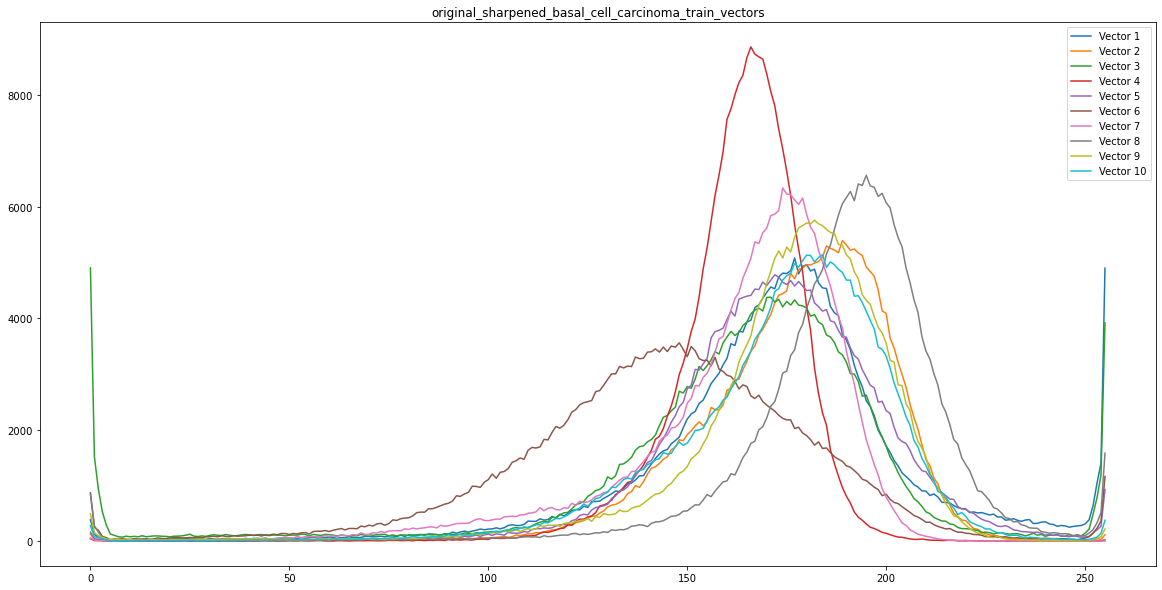

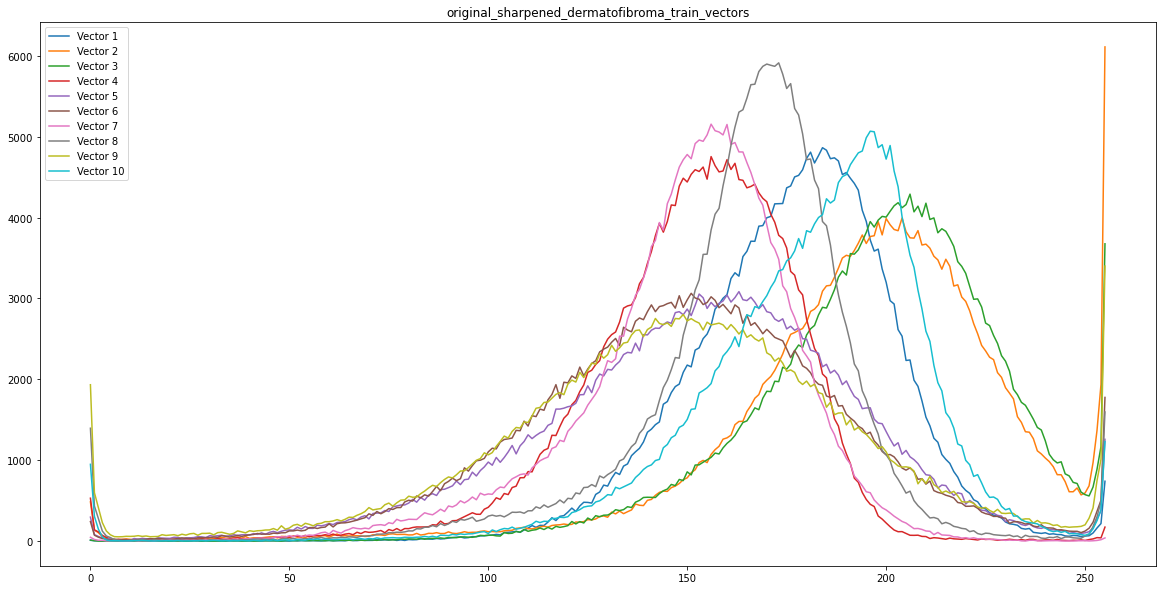

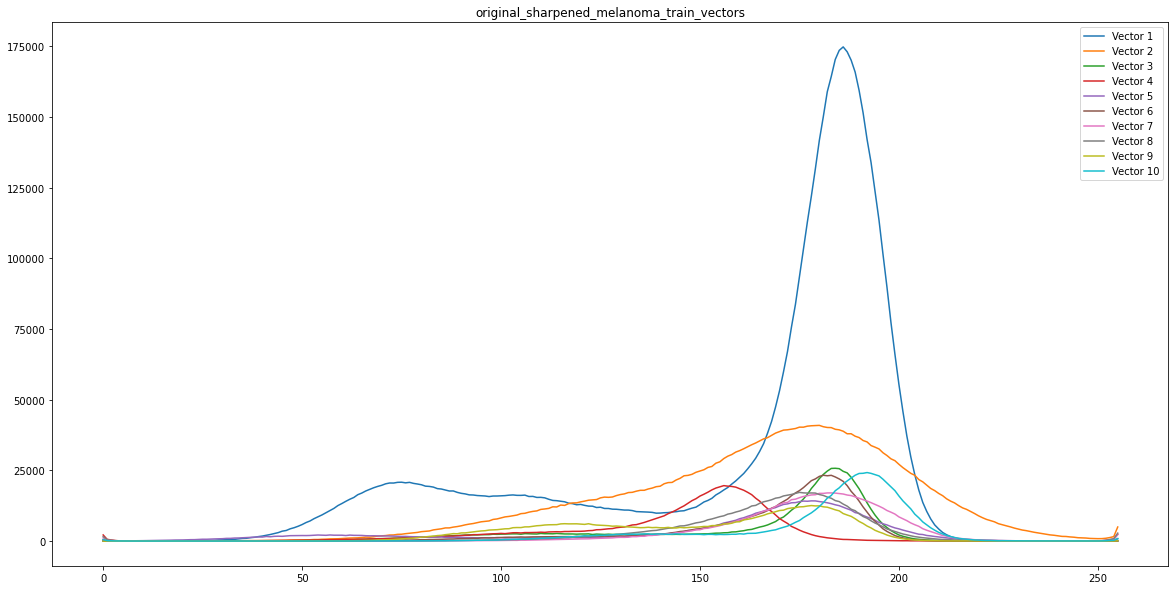

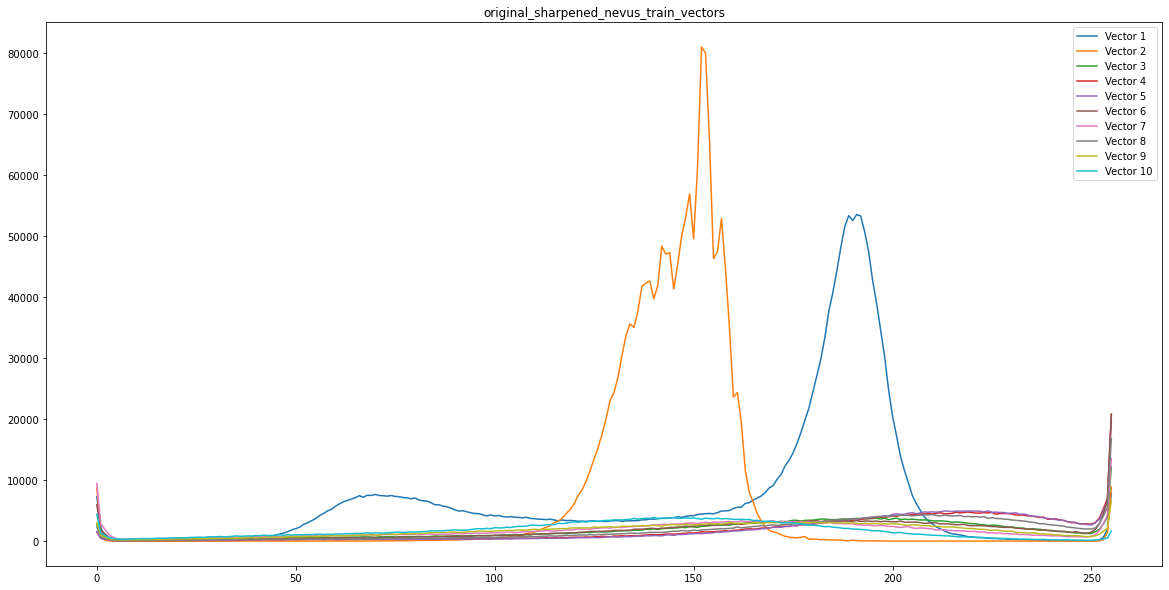

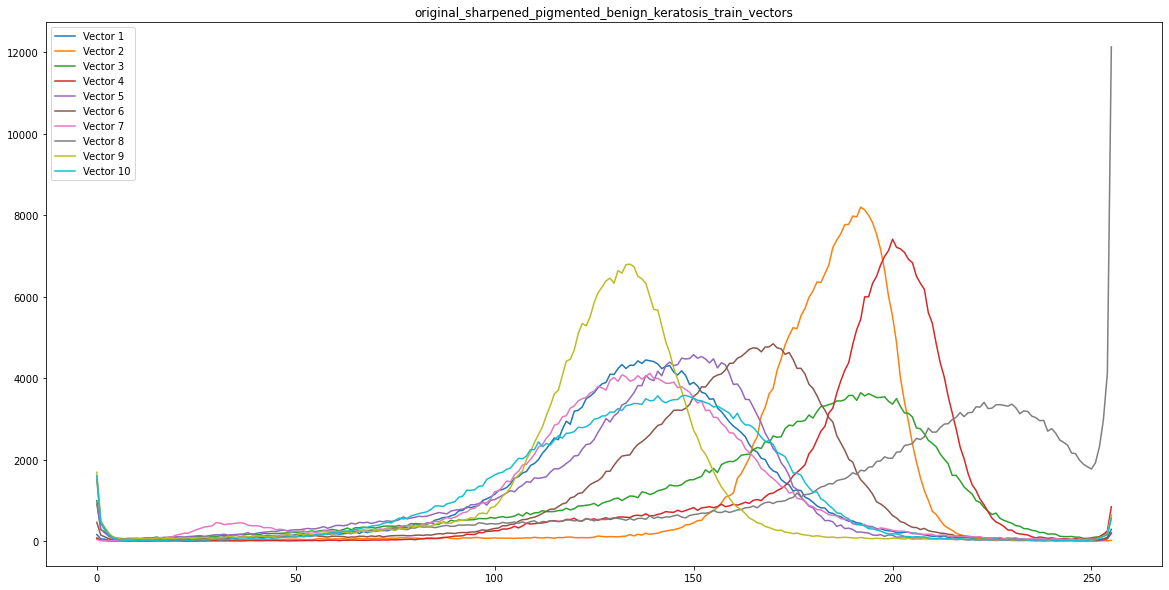

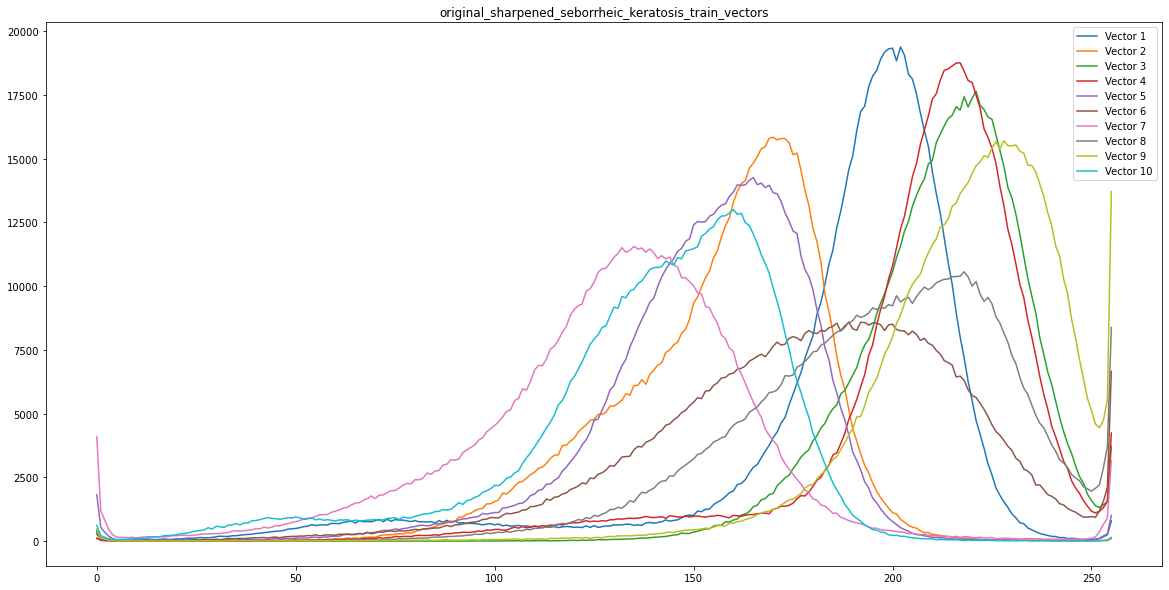

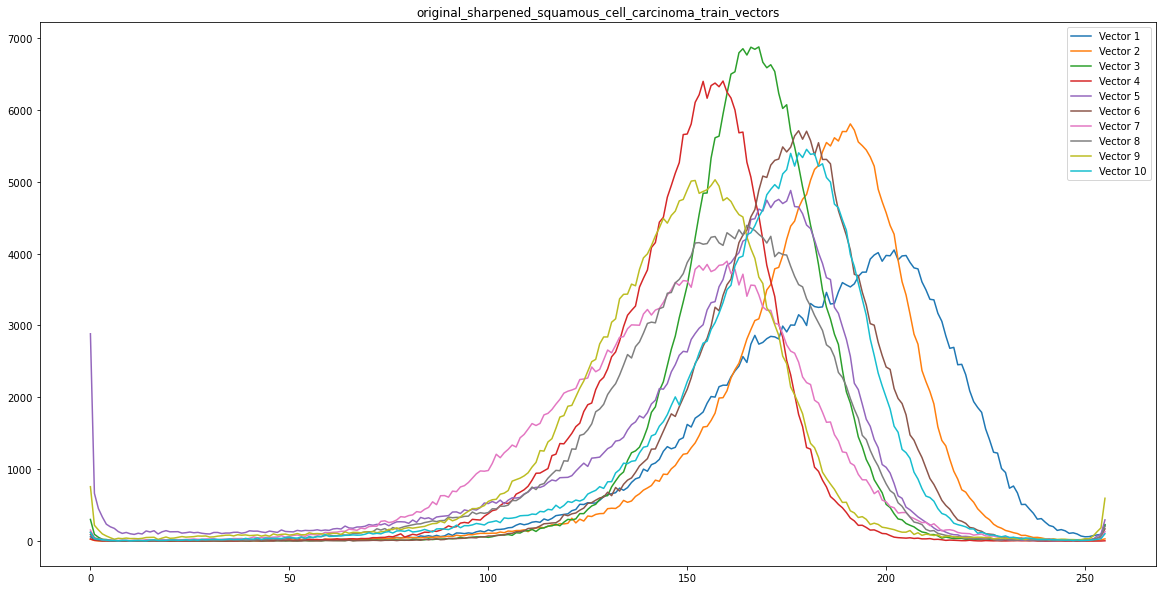

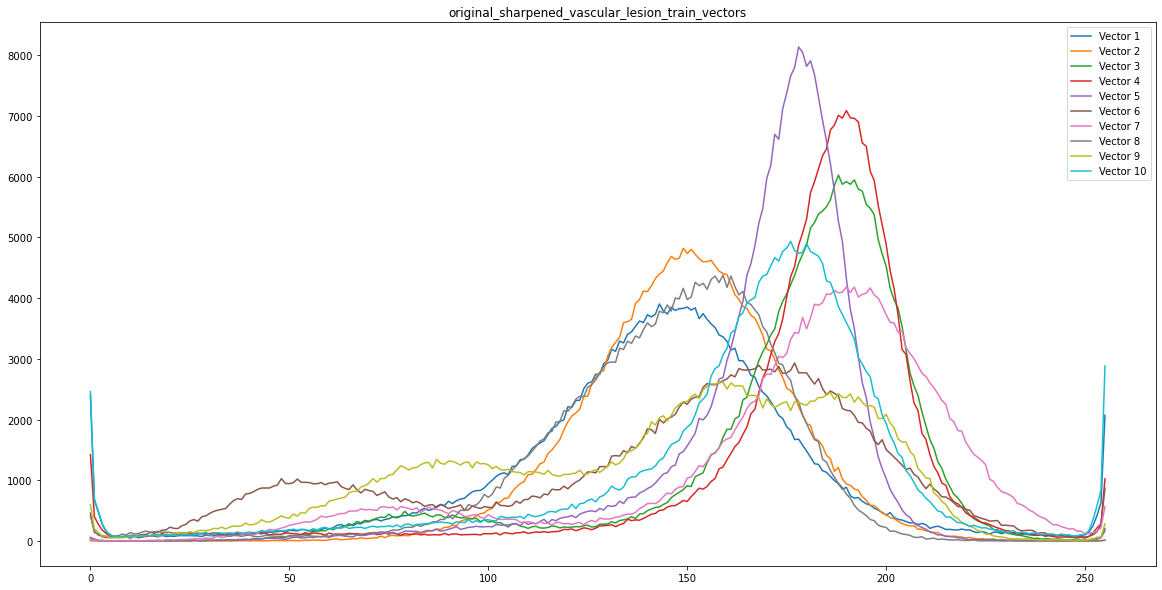

In [22]:
# plot 9 vectors each

plot_vectors(actinic_keratosis_train_vectors, 10, "original_sharpened_actinic_keratosis_train_vectors")
plot_vectors(basal_cell_carcinoma_train_vectors, 10, "original_sharpened_basal_cell_carcinoma_train_vectors")
plot_vectors(dermatofibroma_train_vectors, 10, "original_sharpened_dermatofibroma_train_vectors")
plot_vectors(melanoma_train_vectors, 10, "original_sharpened_melanoma_train_vectors")
plot_vectors(nevus_train_vectors, 10, "original_sharpened_nevus_train_vectors")
plot_vectors(pigmented_benign_keratosis_train_vectors, 10, "original_sharpened_pigmented_benign_keratosis_train_vectors")
plot_vectors(seborrheic_keratosis_train_vectors, 10, "original_sharpened_seborrheic_keratosis_train_vectors")
plot_vectors(squamous_cell_carcinoma_train_vectors, 10, "original_sharpened_squamous_cell_carcinoma_train_vectors")
plot_vectors(vascular_lesion_train_vectors, 10, "original_sharpened_vascular_lesion_train_vectors")


In [23]:
# Vector Normalization

max_value = actinic_keratosis_train_vectors[0][0]

for i in range(0,len(actinic_keratosis_train_vectors)):
    for j in range(0,len(actinic_keratosis_train_vectors[i])):
        if actinic_keratosis_train_vectors[i][j] > max_value:
            max_value = actinic_keratosis_train_vectors[i][j]

for i in range(0,len(basal_cell_carcinoma_train_vectors)):
    for j in range(0,len(basal_cell_carcinoma_train_vectors[i])):
        if basal_cell_carcinoma_train_vectors[i][j] > max_value:
            max_value = basal_cell_carcinoma_train_vectors[i][j]

for i in range(0,len(dermatofibroma_train_vectors)):
    for j in range(0,len(dermatofibroma_train_vectors[i])):
        if dermatofibroma_train_vectors[i][j] > max_value:
            max_value = dermatofibroma_train_vectors[i][j]

for i in range(0,len(melanoma_train_vectors)):
    for j in range(0,len(melanoma_train_vectors[i])):
        if melanoma_train_vectors[i][j] > max_value:
            max_value = melanoma_train_vectors[i][j]

for i in range(0,len(nevus_train_vectors)):
    for j in range(0,len(nevus_train_vectors[i])):
        if nevus_train_vectors[i][j] > max_value:
            max_value = nevus_train_vectors[i][j]


for i in range(0,len(pigmented_benign_keratosis_train_vectors)):
    for j in range(0,len(pigmented_benign_keratosis_train_vectors[i])):
        if pigmented_benign_keratosis_train_vectors[i][j] > max_value:
            max_value = pigmented_benign_keratosis_train_vectors[i][j]

for i in range(0,len(seborrheic_keratosis_train_vectors)):
    for j in range(0,len(seborrheic_keratosis_train_vectors[i])):
        if seborrheic_keratosis_train_vectors[i][j] > max_value:
            max_value = seborrheic_keratosis_train_vectors[i][j]

for i in range(0,len(squamous_cell_carcinoma_train_vectors)):
    for j in range(0,len(squamous_cell_carcinoma_train_vectors[i])):
        if squamous_cell_carcinoma_train_vectors[i][j] > max_value:
            max_value = squamous_cell_carcinoma_train_vectors[i][j]

for i in range(0,len(vascular_lesion_train_vectors)):
    for j in range(0,len(vascular_lesion_train_vectors[i])):
        if vascular_lesion_train_vectors[i][j] > max_value:
            max_value = vascular_lesion_train_vectors[i][j]

for i in range(0,len(actinic_keratosis_test_vectors)):
    for j in range(0,len(actinic_keratosis_test_vectors[i])):
        if actinic_keratosis_test_vectors[i][j] > max_value:
            max_value = actinic_keratosis_test_vectors[i][j]

for i in range(0,len(basal_cell_carcinoma_test_vectors)):
    for j in range(0,len(basal_cell_carcinoma_test_vectors[i])):
        if basal_cell_carcinoma_test_vectors[i][j] > max_value:
            max_value = basal_cell_carcinoma_test_vectors[i][j]

for i in range(0,len(dermatofibroma_test_vectors)):
    for j in range(0,len(dermatofibroma_test_vectors[i])):
        if dermatofibroma_test_vectors[i][j] > max_value:
            max_value = dermatofibroma_test_vectors[i][j]

for i in range(0,len(melanoma_test_vectors)):
    for j in range(0,len(melanoma_test_vectors[i])):
        if melanoma_test_vectors[i][j] > max_value:
            max_value = melanoma_test_vectors[i][j]

for i in range(0,len(nevus_test_vectors)):
    for j in range(0,len(nevus_test_vectors[i])):
        if nevus_test_vectors[i][j] > max_value:
            max_value = nevus_test_vectors[i][j]

for i in range(0,len(pigmented_benign_keratosis_test_vectors)):
    for j in range(0,len(pigmented_benign_keratosis_test_vectors[i])):
        if pigmented_benign_keratosis_test_vectors[i][j] > max_value:
            max_value = pigmented_benign_keratosis_test_vectors[i][j]

for i in range(0,len(seborrheic_keratosis_test_vectors)):
    for j in range(0,len(seborrheic_keratosis_test_vectors[i])):
        if seborrheic_keratosis_test_vectors[i][j] > max_value:
            max_value = seborrheic_keratosis_test_vectors[i][j]

for i in range(0,len(squamous_cell_carcinoma_test_vectors)):
    for j in range(0,len(squamous_cell_carcinoma_test_vectors[i])):
        if squamous_cell_carcinoma_test_vectors[i][j] > max_value:
            max_value = squamous_cell_carcinoma_test_vectors[i][j]

for i in range(0,len(vascular_lesion_test_vectors)):
    for j in range(0,len(vascular_lesion_test_vectors[i])):
        if vascular_lesion_test_vectors[i][j] > max_value:
            max_value = vascular_lesion_test_vectors[i][j]

print(max_value)

808611.0


In [24]:
# divide each value by max value

for i in actinic_keratosis_train_vectors:
    for j in range(0,len(i)):
        i[j] = i[j]/max_value

for i in basal_cell_carcinoma_train_vectors:
    for j in range(0,len(i)):
        i[j] = i[j]/max_value

for i in dermatofibroma_train_vectors:
    for j in range(0,len(i)):
        i[j] = i[j]/max_value

for i in melanoma_train_vectors:
    for j in range(0,len(i)):
        i[j] = i[j]/max_value

for i in nevus_train_vectors:
    for j in range(0,len(i)):
        i[j] = i[j]/max_value

for i in pigmented_benign_keratosis_train_vectors:
    for j in range(0,len(i)):
        i[j] = i[j]/max_value

for i in seborrheic_keratosis_train_vectors:
    for j in range(0,len(i)):
        i[j] = i[j]/max_value

for i in squamous_cell_carcinoma_train_vectors:
    for j in range(0,len(i)):
        i[j] = i[j]/max_value

for i in vascular_lesion_train_vectors:
    for j in range(0,len(i)):
        i[j] = i[j]/max_value

for i in actinic_keratosis_test_vectors:
    for j in range(0,len(i)):
        i[j] = i[j]/max_value

for i in basal_cell_carcinoma_test_vectors:
    for j in range(0,len(i)):
        i[j] = i[j]/max_value

for i in dermatofibroma_test_vectors:
    for j in range(0,len(i)):
        i[j] = i[j]/max_value

for i in melanoma_test_vectors:
    for j in range(0,len(i)):
        i[j] = i[j]/max_value

for i in nevus_test_vectors:
    for j in range(0,len(i)):
        i[j] = i[j]/max_value

for i in pigmented_benign_keratosis_test_vectors:
    for j in range(0,len(i)):
        i[j] = i[j]/max_value

for i in seborrheic_keratosis_test_vectors:
    for j in range(0,len(i)):
        i[j] = i[j]/max_value

for i in squamous_cell_carcinoma_test_vectors:
    for j in range(0,len(i)):
        i[j] = i[j]/max_value

for i in vascular_lesion_test_vectors:
    for j in range(0,len(i)):
        i[j] = i[j]/max_value

In [25]:
# # save normalized vectors

# saveFile("../features/sharpened/normalised_sharpened/Train/normalised_actinic_keratosis_train_vectors.txt", actinic_keratosis_train_vectors)
# saveFile("../features/sharpened/normalised_sharpened/Train/normalised_basal_cell_carcinoma_train_vectors.txt", basal_cell_carcinoma_train_vectors)
# saveFile("../features/sharpened/normalised_sharpened/Train/normalised_dermatofibroma_train_vectors.txt", dermatofibroma_train_vectors)
# saveFile("../features/sharpened/normalised_sharpened/Train/normalised_melanoma_train_vectors.txt", melanoma_train_vectors)
# saveFile("../features/sharpened/normalised_sharpened/Train/normalised_nevus_train_vectors.txt", nevus_train_vectors)
# saveFile("../features/sharpened/normalised_sharpened/Train/normalised_pigmented_benign_keratosis_train_vectors.txt", pigmented_benign_keratosis_train_vectors)
# saveFile("../features/sharpened/normalised_sharpened/Train/normalised_seborrheic_keratosis_train_vectors.txt", seborrheic_keratosis_train_vectors)
# saveFile("../features/sharpened/normalised_sharpened/Train/normalised_squamous_cell_carcinoma_train_vectors.txt", squamous_cell_carcinoma_train_vectors)
# saveFile("../features/sharpened/normalised_sharpened/Train/normalised_vascular_lesion_train_vectors.txt", vascular_lesion_train_vectors)

# saveFile("../features/sharpened/normalised_sharpened/Test/normalised_actinic_keratosis_test_vectors.txt", actinic_keratosis_test_vectors)
# saveFile("../features/sharpened/normalised_sharpened/Test/normalised_basal_cell_carcinoma_test_vectors.txt", basal_cell_carcinoma_test_vectors)
# saveFile("../features/sharpened/normalised_sharpened/Test/normalised_dermatofibroma_test_vectors.txt", dermatofibroma_test_vectors)
# saveFile("../features/sharpened/normalised_sharpened/Test/normalised_melanoma_test_vectors.txt", melanoma_test_vectors)
# saveFile("../features/sharpened/normalised_sharpened/Test/normalised_nevus_test_vectors.txt", nevus_test_vectors)
# saveFile("../features/sharpened/normalised_sharpened/Test/normalised_pigmented_benign_keratosis_test_vectors.txt", pigmented_benign_keratosis_test_vectors)
# saveFile("../features/sharpened/normalised_sharpened/Test/normalised_seborrheic_keratosis_test_vectors.txt", seborrheic_keratosis_test_vectors)
# saveFile("../features/sharpened/normalised_sharpened/Test/normalised_squamous_cell_carcinoma_test_vectors.txt", squamous_cell_carcinoma_test_vectors)
# saveFile("../features/sharpened/normalised_sharpened/Test/normalised_vascular_lesion_test_vectors.txt", vascular_lesion_test_vectors)


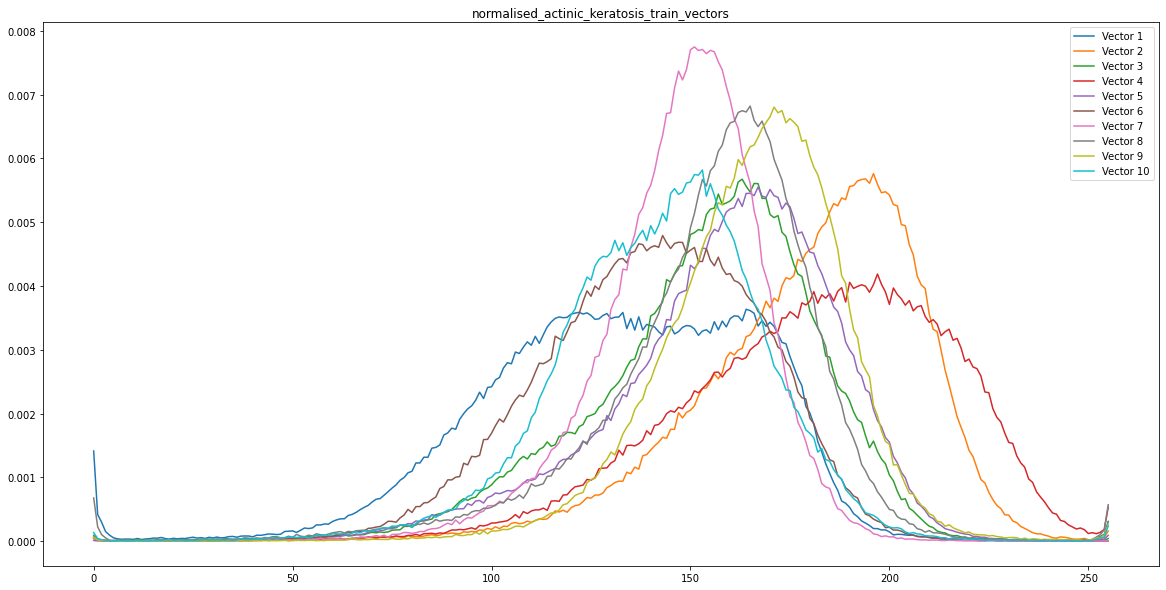

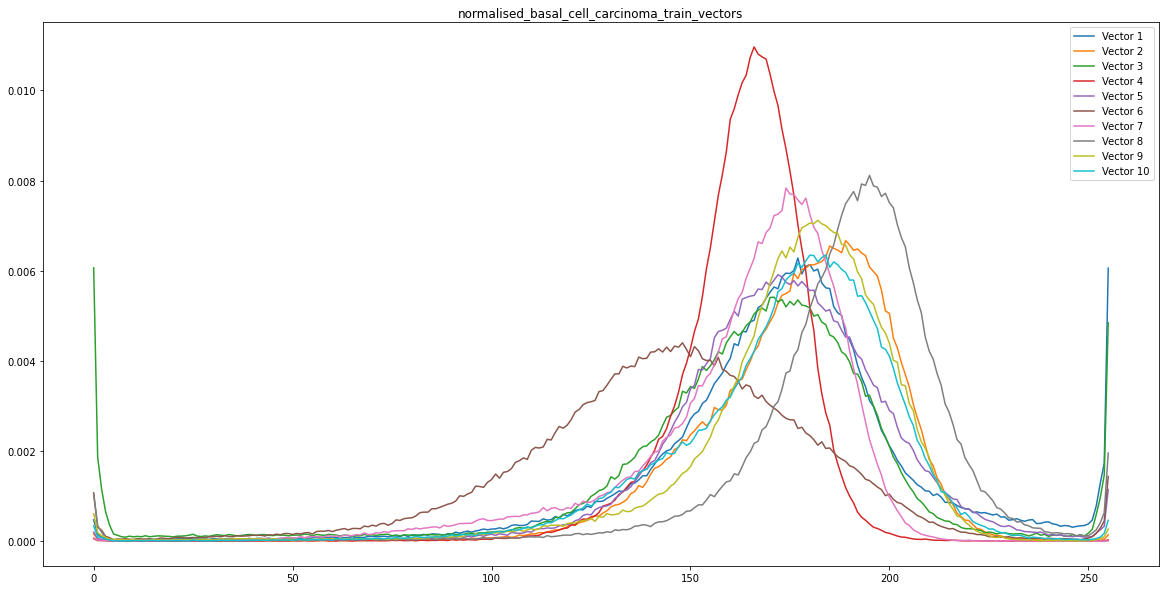

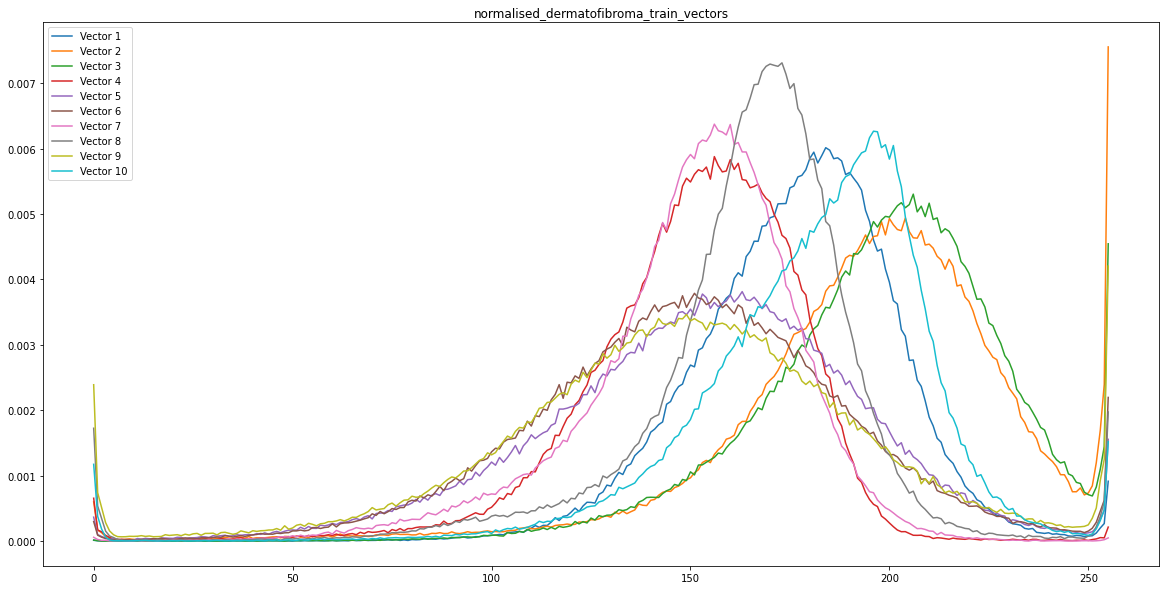

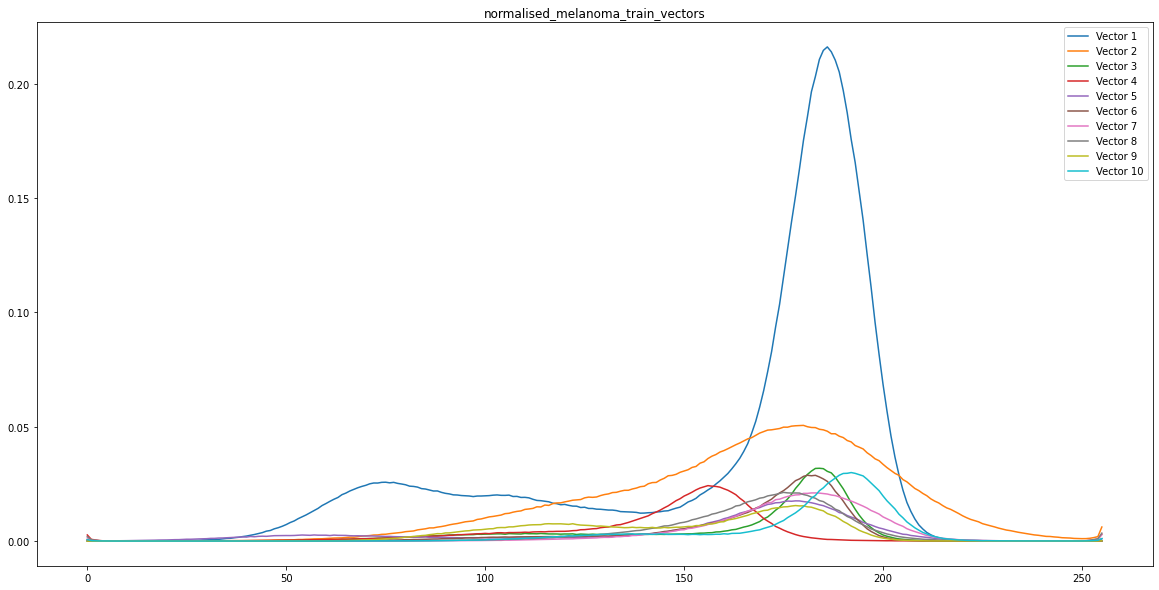

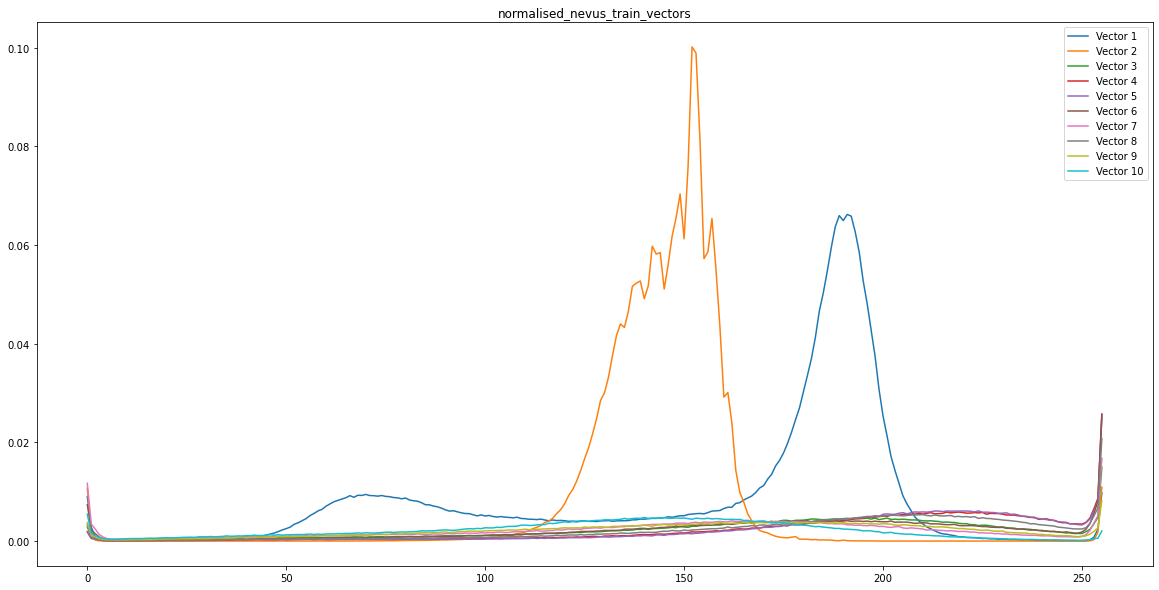

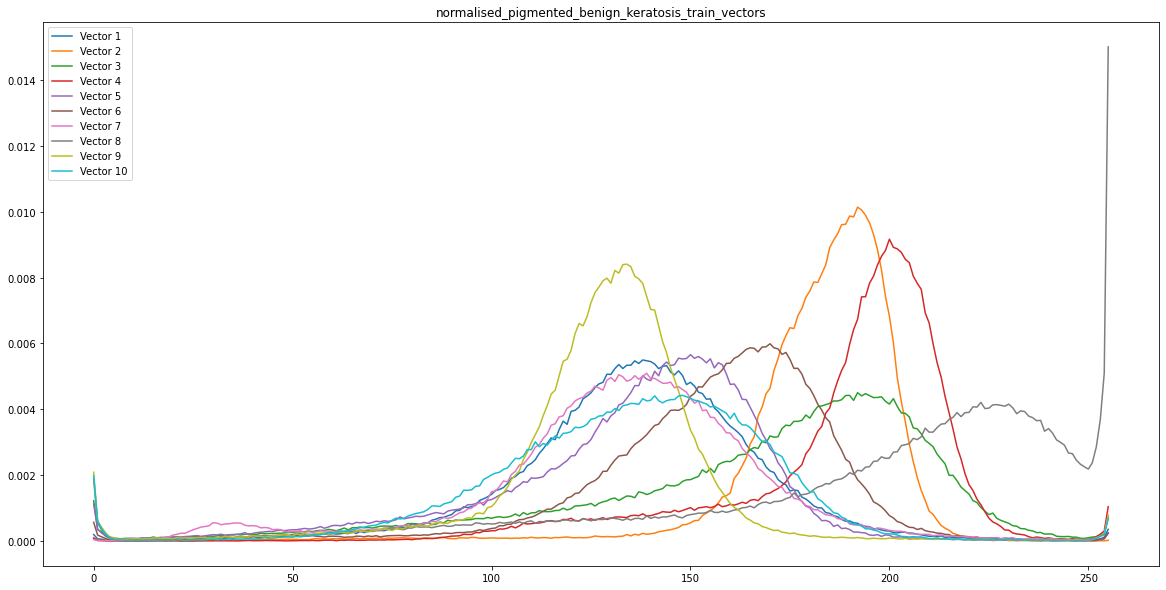

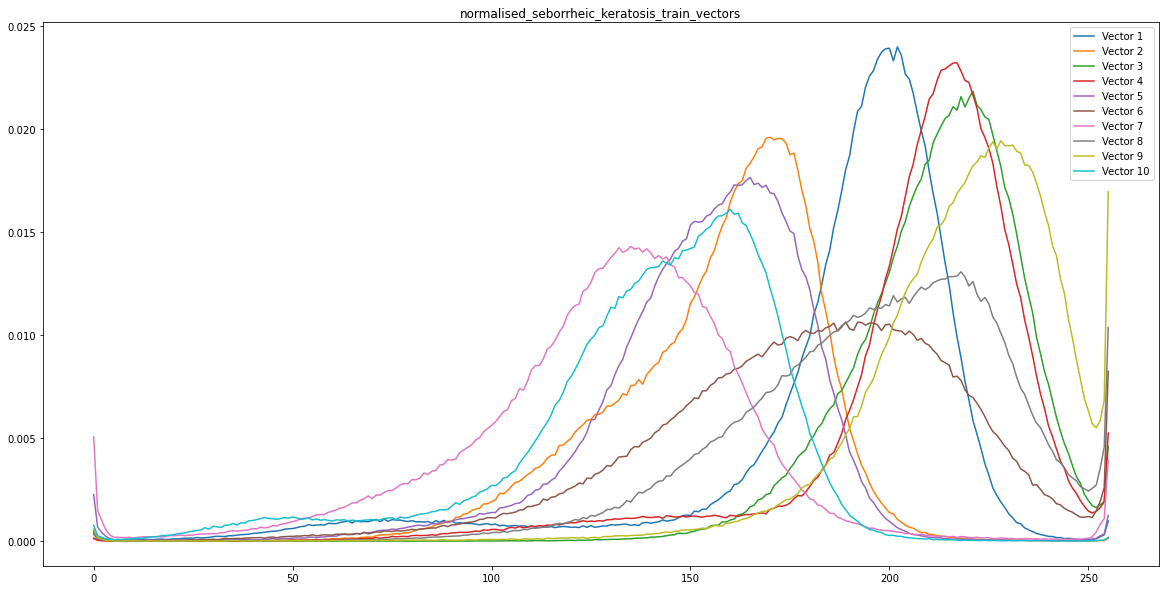

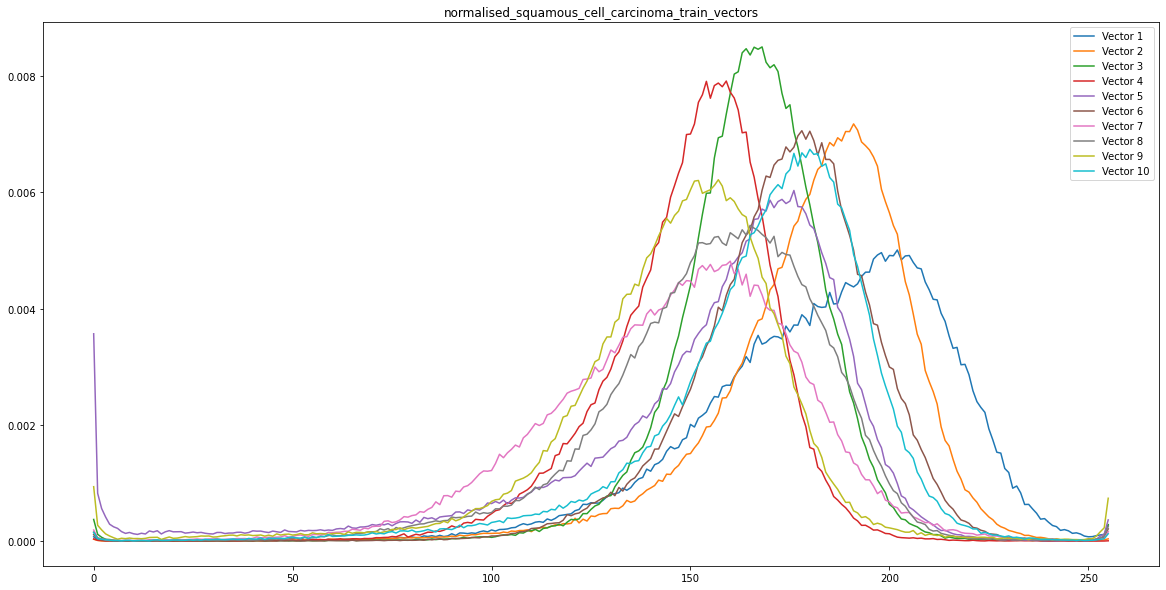

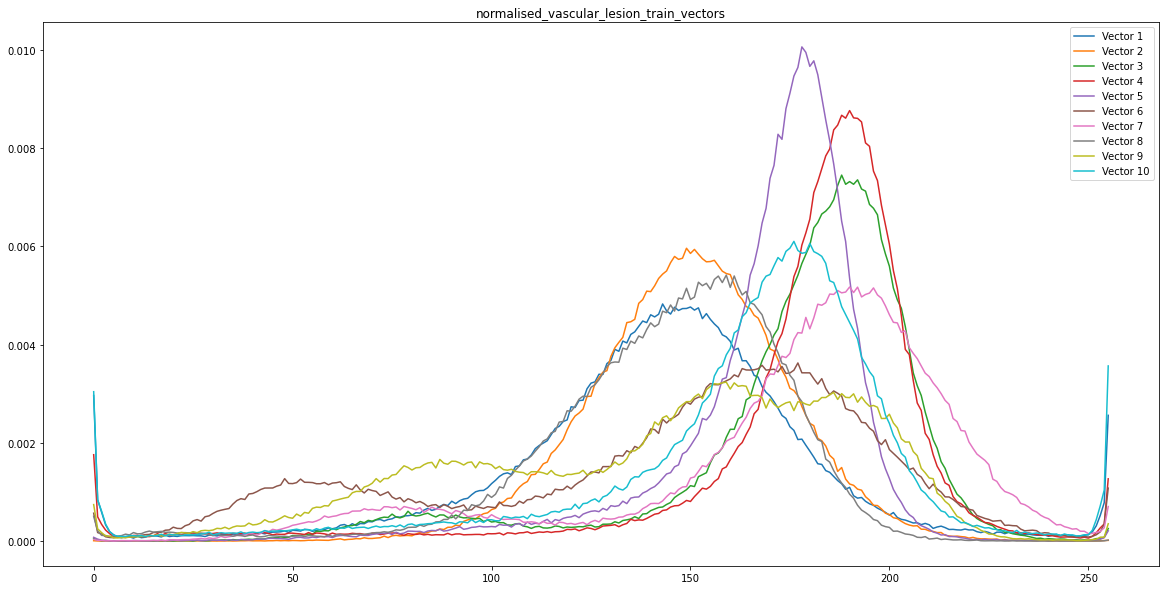

In [26]:
# plot normalized vectors

plot_vectors(actinic_keratosis_train_vectors, 10, "normalised_actinic_keratosis_train_vectors")
plot_vectors(basal_cell_carcinoma_train_vectors, 10, "normalised_basal_cell_carcinoma_train_vectors")
plot_vectors(dermatofibroma_train_vectors, 10, "normalised_dermatofibroma_train_vectors")
plot_vectors(melanoma_train_vectors, 10, "normalised_melanoma_train_vectors")
plot_vectors(nevus_train_vectors, 10, "normalised_nevus_train_vectors")
plot_vectors(pigmented_benign_keratosis_train_vectors, 10, "normalised_pigmented_benign_keratosis_train_vectors")
plot_vectors(seborrheic_keratosis_train_vectors, 10, "normalised_seborrheic_keratosis_train_vectors")
plot_vectors(squamous_cell_carcinoma_train_vectors, 10, "normalised_squamous_cell_carcinoma_train_vectors")
plot_vectors(vascular_lesion_train_vectors, 10, "normalised_vascular_lesion_train_vectors")
